# ДЗ 1, часть 2. Теория информации

Имя, Фамилия: Игнат Сальников

группа: 221

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [1]:
#all imports here please
import pickle as pkl

from collections import OrderedDict
import heapq

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
#... add your own if necessary

Энтропию можно использовать не только для описания хаотичности, беспорядочности и уровня неопределённости, но и для того, чтобы исследовать зависимость между случайными величинами, используя теорию информации. Начнём с базовых вещей и постепенно дойдём до ультрапопулярной эвристики выбора важных признаков для машинного обучения -- взаимной информации.

## Задача 1. Поисследуем энтропию (2 балла)

Будем предполагать, что нам даны две случайных величины $X,Y$, можете предполагать, что они дискретные или имеют плотности, выкладок этот факт не изменит, но делайте всё по одному стандарту: укажите ниже и придерживайтесь его на всём протяжении ДЗ, если явно не просят сделать иначе.

### Независимость?

Покажите, что если две случайных величины $X,Y$ независимы, то $H(X,Y)=H(X)+H(Y)$.

Имейте в виду, что слева под знаком энтропии ДВЕ случайных величины, рассматриваемых как 2d-вектор, поэтому матожидание берётся по их совместному закону распределения. Это называется *совместной энтропией* величин $X,Y$.

$$
- H(X,Y) = \sum_{x, y} p(x, y) \log p(x, y) = |\text{независ.}| = \sum_{x, y} p(x, y) \left[\log p(x) + \log p(y)\right] = \sum_{x, y} p(x, y) \log p(x) + \sum_{x, y} p(x, y) \log p(y) =
$$

$$
= \sum_{x, y} p(x) p(y) \log p(x) + \sum_{x, y} p(x) p(y) \log p(y) = \sum_{y} p(y) \sum_{x} p(x) \log p(x) + \sum_{x}  p(x) \sum_{y} p(y) \log p(y) =
$$

$$
= - \sum_{y} p(y) H(X) - \sum_{x}  p(x) H(Y) = |\text{вероятности суммируются в } 1|= - H(X) - H(Y)
$$

### Зависимость?

Покажите, что в общем случае

$$
H(X,Y) = H(X) + H(Y \vert X)
$$
и вычислите, чему будет равен остаток $H(Y \vert X)$. Он носит название *условной энтропии*, не путайте с энтропией условного распределения.

$$
- H(X,Y) = \sum_{x, y} p(x, y) \log p(x, y) = \sum_{x, y} p(x, y) \left[\log p(y|x) + \log p(x)\right] = \sum_{x, y} p(x, y) \log p(y|x) + \sum_{x, y} p(x, y) \log p(x) =
$$

$$
= \sum_{x, y} p(y, x) \log p(y|x) + \sum_{x, y} p(y|x)p(x) \log p(x) = \sum_{x, y} p(y, x) \log p(y|x) + \sum_x p(x) \log p(x) \sum_y p(y|x) = 
$$

$$
= |\text{вероятности суммируются в } 1| = \sum_{x, y} p(y, x) \log p(y|x) + \sum_x p(x) \log p(x) = \sum_{x, y} p(y, x) \log p(y|x) - H(X)
$$

Получается, что условной энтропией мы называем величину равную

$$
- \sum_{x, y} p(y, x) \log p(y|x) = - \sum_x p(x) \sum_y p(y|x) \log p(y|x)
$$

Обоснуйте, какой может быть физический смысл $H(Y\vert X)$ (что она измеряет?) с точки зрения теории кодирования в случае дискретных СВ $X,Y$.

Сколько в среднем дополнительных бит информации необходимо для кодирования собития $Y$ при условии что произошло событие $X$.

## Задача 2. Взаимная информация (2 балла)

Можно рассмотреть разницу

$$
I(X,Y) = H(X) - H(X \vert Y),
$$

которая отражает в некотором смысле (вы наверняка об этом думали в окошке выше) уровень использования информации о значении $Y$ при кодировании $X$ (если мы о кодировании). Эта величина носит название *взаимной информации* и является ещё одним хорошим способом исследования зависимости между случайными величинами. Библиотека `sklearn` позволяет оценивать её по данным и тем самым выделять самые важные признаки для моделей машинного обучения.

### Симметричность

Докажите, что $I(X,Y)=I(Y,X)$.

$$
I(X,Y) = H(X) + H(Y) - H(Y) - H(X|Y) = H(X) + H(Y) - H(X,Y) =
$$

$$
= H(X) + H(Y) - H(X) - H(Y|X) = I(Y,X)
$$

### Связь с KL

Докажите, что $I(X,Y)= D_{KL}( p_{X,Y} \vert p_{X}p_{Y})$. Слева совместное распределение $X,Y$, справа -- произведение вероятностей $X,Y$. 

$$
- D_{KL}( p_{X,Y} | p_{X}p_{Y}) = \sum_{x, y} p(x, y) \log \frac{p(x, y)}{p(x) p(y)} = \sum_{x, y} p(x, y) \left[\log p(x|y) - \log p(x) \right] = 
$$

$$
= \sum_{x, y} p(x, y) \log p(x|y) - \sum_x p(x)  \log p(x) \sum_y p(y | x) = |\text{вероятности суммируются в } 1| =
$$

$$
\sum_{x, y} p(x, y) \log p(x|y) + H(X) = -H(X, Y) + H(X) = - I(X,Y)
$$

### Какой смысл?..

Как вы думаете, как интерпретируется $I(X,Y)$ в терминах теории кодирования (при дискретных $X,Y$)? Что измеряет эта величина?

На сколько мы можем сократить среднюю длину кода для $X$, при условии что мы знаем $Y$.

## Максимальная энтропия (3 балла)

### Экспоненциальное распределение

(1 балл) Вычислите энтропию для экспоненциального распределения $Exp(\lambda)$ и распределения Лапласа $Laplace(0,\lambda)$, имеющее плотность $\frac{\lambda}{2} e^{-\lambda \vert x\vert }$.

$$
- H_{Exp(\lambda)}(X) = \int_0^{\infty} \lambda e^{-\lambda x} \ln({ \lambda e^{-\lambda x}}) \, dx = 
$$

$$
 = \int_0^{\infty} \lambda e^{-\lambda x} \ln({ \lambda }) \, dx -\lambda \int_0^{\infty} \lambda x e^{-\lambda x} \, dx 
$$

$$
H_{Exp(\lambda)}(X) = \lambda \mathbb{E}_{Exp(\lambda)}(x) - \ln{ \lambda } = 1 - \ln{ \lambda } 
$$


Для лапласа аналогиночно

$$
- H_{Laplace(0,\lambda)}(X) = \int_{-\infty}^{\infty} \frac{\lambda}{2} e^{-\lambda |x|} \ln({ \frac{\lambda}{2} e^{-\lambda |x|}}) \, dx =
$$

$$
= \int_{0}^{\infty} \lambda e^{-\lambda x} \ln({ \frac{\lambda}{2} e^{-\lambda x}}) \, dx = 
$$

$$
 = \int_0^{\infty} \lambda e^{-\lambda x} \ln(\frac{\lambda}{2}) \, dx -\lambda \int_0^{\infty} \lambda x e^{-\lambda x} \, dx 
$$


$$
H_{Laplace(0,\lambda)}(X) = \lambda \mathbb{E}_{Exp(\lambda)}(x) - \ln{\frac{\lambda}{2} } = 1 - \ln{ \frac{\lambda}{2} } 
$$






(2 балла) Докажите, что Экспоненциальное распределение $Exp(\lambda)$ имеет максимальную энтропию среди всех абсолютно непрерывных вероятностных распределений с фиксированным средним и имеющих ненулевую плотность в области $x\geq 0$.

Пусть задана абсолютно непрерывная вероятностная мера $p(x)$ на носителе $x \geq 0$ с фиксированным средним $\mathbb{E}_{q}(x) = \mathbb{E}_{Exp(\lambda)}(x) = \frac{1}{\lambda}$, тогда
$$
- CE(p | q \sim Exp(\lambda)) = \int_0^{\infty} p(x) \ln({ \lambda e^{-\lambda x}}) = 
$$

$$
= \int_0^{\infty} p(x)  \ln({ \lambda }) \, dx -\lambda  \int_0^{\infty} x  p(x) \, dx 
$$

$$
CE(p | q \sim Exp(\lambda))  = -\lambda \mathbb{E}_{p}(x) - \ln { \lambda } = 1 - \ln { \lambda } = H_{Exp(\lambda)}(X) 
$$

$$
D_{KL}(p || q) = CE(p|q) - H(p) = H_{Exp(\lambda)}(X) - H(p) \geq 0
$$

И значит

$$
H_{Exp(\lambda)}(X) \geq H(p)
$$


## Строим свой код, основанный на частотах (3 балла)

Представим себе для примера достаточно большую книгу (например, Войну и Мир Льва Николаевича Толстого). Для того, чтобы записывать буквы в кодировке UTF-8 требуется от 2 до 4 байт (каждый 8бит). Но книга -- это не просто какой-то iid равновероятный поток символов, а структурированный текст, структуру которого можно по-разному использовать. К примеру, мы можем задуматься над тем, чтобы сжать её, используя информацию о том, какие символы встречаются чаще: ведь более частые можно кодировать более короткими кодовыми словами, а более редкие -- более длинными.

В этом идея [кода Хаффмана](https://compression.ru/download/articles/huff/huffman_1952_minimum-redundancy-codes.pdf), который мы попробуем поисследовать в самой простой наивной имплементации.

### Вычисляем языковую статистику

Возьмём для примера текст вики-страницы [МО1](http://wiki.cs.hse.ru/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_1)

In [2]:
with open("moText.txt","r", encoding="utf-8") as f:
    MOText = "\n".join(f.readlines())

print(MOText[:180])

Машинное обучение 1

Содержание



    1 О курсе

        1.1 Полезные ссылки

        1.2 Семинары

        1.3 Ассистенты

        1.4 Правила выставления оценок

        1.5 Пра


Это не сильно большой, но не очень маленький текст.

In [3]:
print(len(MOText))

7581


Вычислите частоту каждого символа, сохранив их в упорядоченный словарь (OrderedDict, пригодится для сортировок)  вида {<символ>: <частота>}.

In [4]:
import collections
import re

d = collections.OrderedDict()

for i in MOText:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1


symFreqs = d

In [5]:
for key,val in symFreqs.items():
    print(f"{key}: {val}")
print(f"In total {len(symFreqs)} unique symbols, max freq= {max([val for val in symFreqs.values()])}")

М: 45
а: 398
ш: 29
и: 355
н: 351
о: 354
е: 389
 : 919
б: 52
у: 97
ч: 85
1: 51

: 497
С: 35
д: 139
р: 198
ж: 20
О: 14
к: 139
с: 192
.: 94
П: 62
л: 166
з: 67
ы: 82
2: 107
м: 113
3: 14
А: 39
т: 186
4: 19
в: 160
я: 75
ц: 30
5: 15
й: 62
Л: 5
Т: 10
6: 13
Б: 30
7: 9
К: 31
ь: 44
8: 6
Э: 12
9: 14
г: 55
п: 87
ю: 17
х: 20
0: 47
щ: 8
b: 13
o: 43
r: 48
d: 22
e: 76
l: 31
s: 65
-: 7
И: 38
Ф: 4
Н: 14
В: 24
Ш: 6
:: 35
Е: 6
Р: 17
G: 8
i: 72
t: 91
H: 8
u: 17
э: 7
/: 63
(: 11
A: 11
n: 47
y: 18
T: 16
a: 55
k: 16
,: 33
): 11
h: 45
c: 23
m: 39
+: 19
<: 2
>: 1
@: 3
g: 26
ъ: 1
p: 34
x: 6
F: 10
f: 8
S: 10
M: 24
w: 7
D: 8
Ч: 1
V: 8
U: 6
R: 10
Z: 10
W: 10
J: 10
q: 1
I: 6
X: 5
_: 6
B: 4
N: 13
C: 16
v: 7
P: 22
O: 2
?: 2
=: 2
ф: 12
Г: 2
	: 58
z: 8
Y: 6
L: 11
Д: 32
E: 6
K: 6
j: 2
У: 5
Q: 4
Я: 3
З: 11
Ю: 1
*: 4
—: 4
ё: 4
!: 1
Ж: 1
[: 1
]: 1
In total 142 unique symbols, max freq= 919


### Строим Кодер и Декодер Хаффмана

Это хорошее упражнение для ценителей алгоритмов, но давайте сократим себе время и попробуем адаптировать одну из [доступных реализаций](https://www.geeksforgeeks.org/huffman-coding-in-python/) под наш сценарий, обернув в привычную классовую структуру и сохранив максимальную представленность самого алгоритма.

In [6]:
#taken from https://www.geeksforgeeks.org/huffman-coding-in-python/
class Node:
    def __init__(self, symbol=None, frequency=None):
        #print("CREATING", symbol, frequency)
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(chars, freq):
  
    # Create a priority queue of nodes
    priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        left_child = heapq.heappop(priority_queue)
        right_child = heapq.heappop(priority_queue)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]

def generate_huffman_codes(node, code="", huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        else:
            generate_huffman_codes(node.left, code + "0", huffman_codes)
            generate_huffman_codes(node.right, code + "1", huffman_codes)

    return huffman_codes

def runTest():
    # Given example (try it to test)
    chars = ['a', 'b', 'c', 'd', 'e', 'f']
    freq = [4, 7, 15, 17, 22, 42]

    # Build the Huffman tree
    root = build_huffman_tree(chars, freq)

    # Generate Huffman codes
    huffman_codes = generate_huffman_codes(root)

    # Print Huffman codes
    for char, code in huffman_codes.items():
        print(f"Character: {char}, Code: {code}")
        
runTest()

Character: f, Code: 0
Character: a, Code: 1000
Character: b, Code: 1001
Character: c, Code: 101
Character: d, Code: 110
Character: e, Code: 111


Надеемся, что этот код заработал.... Теперь напишем кодер, используя эту технологию.

In [7]:
class HuffmanCoderDecoder:
    
    def __init__(self,symbolProbaTable):
        """_summary_

        Args:
            symbolProbaTable (dict): a dict with symbol(keys) and probabilities (val)
        """ 
        self.symbols = list(symbolProbaTable.keys())
        self.probas = list(symbolProbaTable.values())
        self.symbolProbaTable = symbolProbaTable
        self.root = None
        self.fit()

        
    def fit(self):
        """
        Sets up encoder and decoder tables
        """        
        self.root = build_huffman_tree(self.symbols, self.probas)

        huffman_codes = generate_huffman_codes(self.root)
    
        self.encoderTable = {str(i) : str(j) for i, j in huffman_codes.items()}
        self.decoderTable = {str(j) : str(i) for i, j in huffman_codes.items()}
                
    def encode(self, text):
        """Encodes the text and returns encoded text

        Args:
            text (str): text to encode
        Returns:
            encodedText (str): encoded text
        """
        
        encoded = []
        
        for i in text:
            encoded.append(self.encoderTable[i])
        
        return ''.join(encoded)
    
    def decode(self, text):
        """Decodes the encoded text and returns decoded text

        Args:
            text (str): text to decode
        Returns:
            decodedText (str): decoded text
        """ 
        decoded = []
        node = self.root
        
        for bit in text:
            if bit == '0':
                node = node.left
            else:
                node = node.right

            if node.left is None and node.right is None:
                decoded.append(node.symbol)
                node = self.root

        return ''.join(decoded)

In [8]:
textSample = MOText[:200]

huff = HuffmanCoderDecoder(symFreqs)

encText = huff.encode(textSample)

decText = huff.decode(encText)

In [9]:
print(encText)

000110001010111111000001111011110111110100100111110110101001110111010101001111000000100100011010010101010110001111111111001001000110011101000001011111000000100101010101010101010010010010001101001000111011011001100110011100110000110010010101010100100100100100100100100011010000011101101001001011001111111110010100110000111110111000101001000011000110111000111100111001100001010101010010010010010010010010001101000001110110111001100011101000111100000111100101011001110001101010101001001001001001001001000110100000111011101111100110110010011000110000000110001000100111100010011100011010101010010010010010010010010001101000001111101101101001011001011000101110111000011100101011001101111110001001100010001011101111110010100111100000110101010011111101100000100111101111111001110101010100100100100100100100100011010000011101111111110010110010110001011101110000111001010110000110110010010111101010000100110000101011100100101111100000101101010101010


In [10]:
print(decText)

Машинное обучение 1

Содержание



    1 О курсе

        1.1 Полезные ссылки

        1.2 Семинары

        1.3 Ассистенты

        1.4 Правила выставления оценок

        1.5 Правила сдачи заданий




In [11]:
print(textSample)

Машинное обучение 1

Содержание



    1 О курсе

        1.1 Полезные ссылки

        1.2 Семинары

        1.3 Ассистенты

        1.4 Правила выставления оценок

        1.5 Правила сдачи заданий




Вычислите, какое получилось сжатие

In [12]:
print("Compression(%): ",len(textSample.encode('utf-8'))*8/len(encText)*100)

Compression(%):  261.5548455804047


Поздравляем, вы сделали простой алгоритм сжатия) .... если у вас больше 100%

### Исследуем, как хорошо себя ведёт код при смене текста

Сравните написанный кодер на двух понравившихся вам текстах на разные темы (возьмите по масштабу что-то похожее на страницу МО).

1. Для чистоты эксперимента очистите оба текста от символов, которых нет в другом тексте
2. Посчитайте таблицу частот для каждого из текстов
3. Обучите кодер на тексте 1
4. Обучите кодер на тексте 2
5. Сопоставьте длину (в битах): 
   1. Текст1, закодированный кодером 1
   2. Текст2, закодированный кодером 1
   3. Текст1, закодированный кодером 2
   4. Текст2, закодированный кодером 2
6. Посчитайте KL-дивергенцию и кроссэнтропию в обе стороны между частотами кодера1 и кодера2

Прокомментируйте результат.

Не забудьте приложить к решению ваших два текстовых файла.

In [13]:
with open("DLinSoundProcessing.txt","r", encoding="utf-8") as f:
    text1 = "\n".join(f.readlines())
    
with open("BorisGodunovLibretto.txt","r", encoding="utf-8") as f:
    text2 = "\n".join(f.readlines())

In [14]:
print(len(text1))
print(len(text2))

1704
2713


In [15]:
def do(text):
    d = collections.OrderedDict()

    for i in text:
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1


    symFreqs = d
    
    huff = HuffmanCoderDecoder(symFreqs)

    return symFreqs, huff


symFreqs1, huff1 = do(text1)
symFreqs2, huff2 = do(text2)

In [16]:
# Для чистоты эксперимента очистите оба текста от символов, которых нет в другом тексте

text1 = ''.join(c for c in text1 if c not in set(huff1.symbols).difference(set(huff2.symbols)))
text2 = ''.join(c for c in text2 if c not in set(huff2.symbols).difference(set(huff1.symbols)))

symFreqs1, huff1 = do(text1)
symFreqs2, huff2 = do(text2)

In [17]:
print(len(text1))
print(len(text2))

1388
2667


In [18]:
def CE(base_symFreqs, new_symFreqs):
    sm = 0
    
    sum_of_base_freqs = np.sum([i for i in base_symFreqs.values()])
    sum_of_new_freqs = np.sum([i for i in new_symFreqs.values()])

    for letter, new_freq in new_symFreqs.items():
        
        base_freq = base_symFreqs[letter]
        
        sm += np.log2(base_freq / sum_of_base_freqs) * new_freq / sum_of_new_freqs
        
    return - sm

In [19]:
H1 = CE(symFreqs1, symFreqs1)
CE_from2_to1 = CE(symFreqs2, symFreqs1)

H2 = CE(symFreqs2, symFreqs2)
CE_from1_to2 = CE(symFreqs1, symFreqs2)

In [20]:
print( f"KL(text1 | text2)={CE_from2_to1 - H1}" )
print( f"KL(text2 | text1)={CE_from1_to2 - H2}" )
print( f"CE(text1 | text2)={CE_from2_to1}" )
print( f"CE(text2 | text1)={CE_from1_to2}" )
print( f"H(text1)={H1}" )
print( f"H(text2)={H2}" )

KL(text1 | text2)=0.1819662094368386
KL(text2 | text1)=0.1941041938885597
CE(text1 | text2)=4.8480891586354655
CE(text2 | text1)=5.030592386830515
H(text1)=4.666122949198627
H(text2)=4.836488192941955


In [21]:
print(f"Coding with text1: text1Len={len(huff1.encode(text1))}, text2Len={len(huff1.encode(text2))}") 
print(f"Coding with text2: text1Len={len(huff2.encode(text1))}, text2Len={len(huff2.encode(text2))}") 

Coding with text1: text1Len=6515, text2Len=13456
Coding with text2: text1Len=6749, text2Len=12973


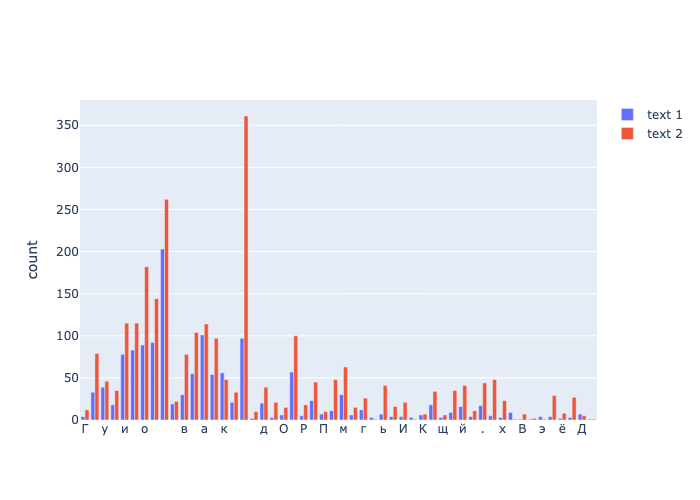

In [22]:
import pandas as pd

df1 = pd.DataFrame({'symbol': list(symFreqs1.keys()), 'count': list(symFreqs1.values())})
df2 = pd.DataFrame({'symbol': list(symFreqs2.keys()), 'count': list(symFreqs2.values())})

fig = go.Figure()

fig.add_trace(go.Bar(x=df1['symbol'], y=df1['count'], name='text 1'))
fig.add_trace(go.Bar(x=df2['symbol'], y=df2['count'], name='text 2'))

fig.update_yaxes(title='count')

fig.show(renderer='png')